# Plot

> A collection of plot functions

In [1]:
#| default_exp plot

In [2]:
#| hide
import sys
sys.path.append('/notebooks/katlas')
from nbdev.showdoc import *
%matplotlib inline

In [3]:
#| export
from katlas.feature import *
from katlas.core import Data
from fastbook import *
import seaborn as sns
from scipy.stats import spearmanr

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
import joblib
from adjustText import adjust_text
from pathlib import Path

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [4]:
#| export
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [5]:
#| export
def reduce_dim(df, 
               method='pca', 
               n_components=2, 
               load=None, # load a previous model
               save=None, # pkl file to be saved, e.g. pca_model.pkl
               seed =123):
    
    "Reduce dim except first column"
    if load is not None:
        reducer = joblib.load(load)
    else:
        if method == 'pca':
            reducer = PCA(n_components=n_components, random_state=seed)
        elif method == 'tsne':
            reducer = TSNE(n_components=n_components, random_state=seed)
        elif method == 'umap':
            reducer = UMAP(n_components=n_components, random_state=seed)
        else:
            raise ValueError('Invalid method specified')

    proj = reducer.fit_transform(df.iloc[:, 1:].values)
    embedding_df = pd.DataFrame(proj, columns=[f"{method.upper()}{i}" for i in range(1, n_components + 1)])
    embedding_df = pd.concat([df[df.columns[0]], embedding_df], axis=1)

    if save is not None:
        path = Path(save)
        path.parent.mkdir(exist_ok=True)
        
        joblib.dump(reducer, save)

    return embedding_df

In [6]:
#| export
def plot_cluster(df, 
                 method='pca', 
                 hue=None, 
                 palette='tab20', 
                 legend=False, 
                 name_list=None, # a list or df Series of names that label the dots
                 seed = 123
                ):
    embedding_df = reduce_dim(df, method=method, seed=seed)
    x_col, y_col = [col for col in embedding_df.columns if col.startswith(method.upper())]
    sns.relplot(data=embedding_df, x=x_col, y=y_col, hue=hue, palette=palette, s=50, alpha=0.8, legend=legend)
    plt.xticks([])
    plt.yticks([])
    if name_list is not None:
        texts = [plt.text(embedding_df['PCA1'][i], embedding_df['PCA2'][i], name_list[i],fontsize=8) for i in range(len(embedding_df))]
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))
    plt.show()
    plt.close()

In [7]:
df = Data.get_aa_feature()

In [8]:
info=Data.get_aa_info()

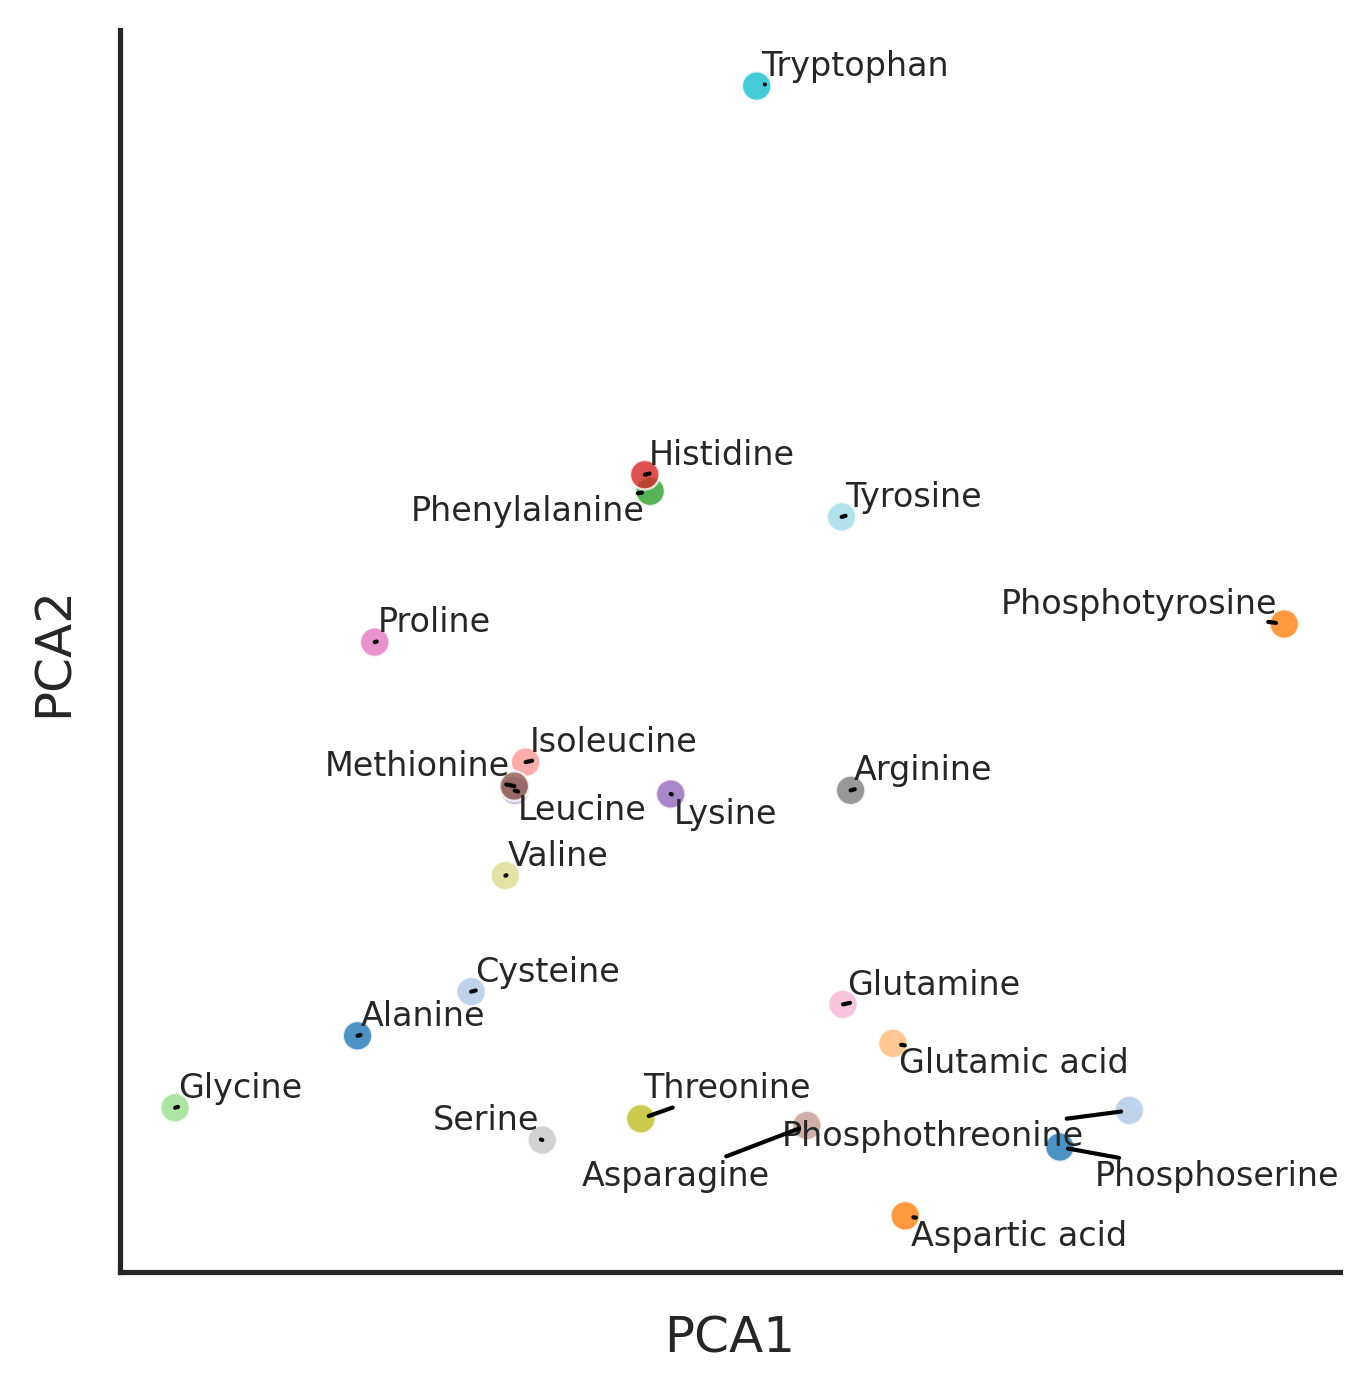

In [9]:
plot_cluster(df, name_list = info.Name,hue='aa')

If not removing highly correlated features

In [10]:
df = info[['aa','SMILES']]

In [11]:
full_feature = smi2prop(df, id_colname='aa',remove_duplicate=False)

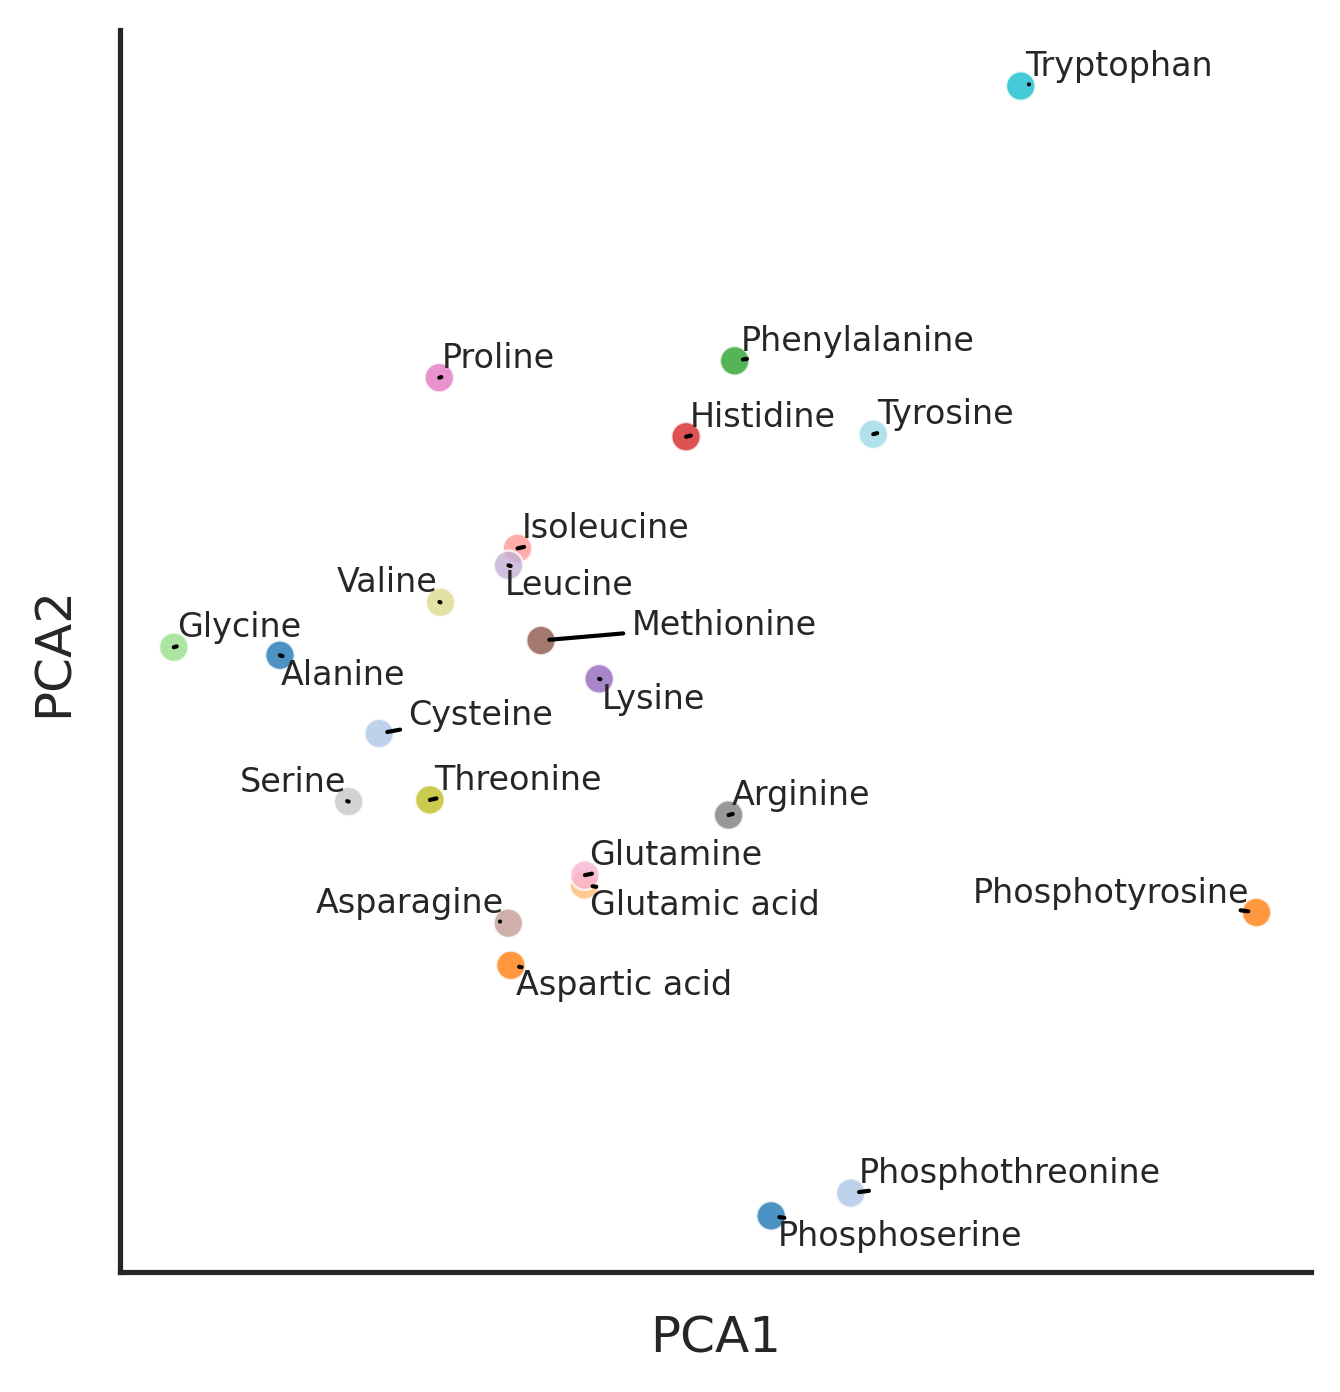

In [12]:
plot_cluster(full_feature, name_list = info.Name,hue='aa')

In [13]:
#| export
def plot_corr(x,#a column of df
              y,#a column of df
              xlabel=None,# x axis label
              ylabel=None,# y axis label
              order=1, # polynomial level, if straight, order=1 
             ):
    correlation, pvalue = spearmanr(x, y)
    sns.regplot(x=x,
            y=y,
            order=order,
            line_kws={'color': 'gray'}
           )
    
    if xlabel is not None:
        plt.xlabel(xlabel)
        
    if ylabel is not None:
        plt.ylabel(ylabel)

    plt.text(x=0.8, y=0.1, s=f'Spearman: {correlation:.2f}', transform=plt.gca().transAxes, ha='center', va='center');

In [14]:
#| hide
import nbdev; nbdev.nbdev_export()

/usr/local/lib/python3.9/dist-packages/nbdev/export.py:54: UserWarning: Notebook '/notebooks/katlas/nbs/tutorial_01_feature_plot.ipynb' uses `#|export` without `#|default_exp` cell.
Note nbdev2 no longer supports nbdev1 syntax. Run `nbdev_migrate` to upgrade.
See https://nbdev.fast.ai/getting_started.html for more information.
  warn(f"Notebook '{nbname}' uses `#|export` without `#|default_exp` cell.\n"
/usr/local/lib/python3.9/dist-packages/nbdev/export.py:54: UserWarning: Notebook '/notebooks/katlas/nbs/tutorial_02_target_transform_plot.ipynb' uses `#|export` without `#|default_exp` cell.
Note nbdev2 no longer supports nbdev1 syntax. Run `nbdev_migrate` to upgrade.
See https://nbdev.fast.ai/getting_started.html for more information.
  warn(f"Notebook '{nbname}' uses `#|export` without `#|default_exp` cell.\n"
/usr/local/lib/python3.9/dist-packages/nbdev/export.py:54: UserWarning: Notebook '/notebooks/katlas/nbs/tutorial_03_train.ipynb' uses `#|export` without `#|default_exp` cell.
No